In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def q_t(P):
    A = lambda t: 2 * P[1]
    B = lambda t: (P[2] - P[0]) * t
    C = lambda t: (2 * P[0] - 5 * P[1] + 4 * P[2] - P[3]) * t ** 2
    D = lambda t:(-P[0] + 3 * P[1] - 3 * P[2] + P[3]) * t ** 3
    return lambda t: (A(t) + B(t) + C(t) + D(t)) / 2

In [22]:
def q_chain(Ps, t):
    points = [] 
    for i in range(len(Ps) - 3):
        q = q_t(Ps[i:i+4])
        points.append(np.apply_along_axis(q, 1, t[:, None]))
    return points

In [24]:
points = np.array([[1, 1],
                   [2, 2],
                   [3, 0],
                   [4, 1]])

In [11]:
q = q_t(points)

In [12]:
t = np.linspace(0, 1)

In [19]:
b = np.apply_along_axis(q, 1 , t[:, None])

In [20]:
def plot_interpol(control_points, interpolated_points):
    plt.scatter(control_points[:, 0], control_points[:, 1],
                c='red', s=56, marker='+', label='Control Points')
    plt.plot(interpolated_points[:, 0], interpolated_points[:, 1], label="Bezier interpolation")
    plt.legend();

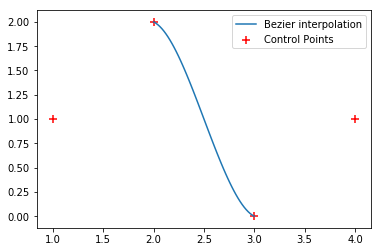

In [21]:
plot_interpol(points, b)

In [45]:
points = np.array([[0.8, 0],
                   [1, 0],
                   [2, 2],
                   [3, -2],
                   [4, 0],
                   [4.2, 0]])

In [46]:
b = np.vstack(q_chain(points, t))

(-2.5, 2.5)

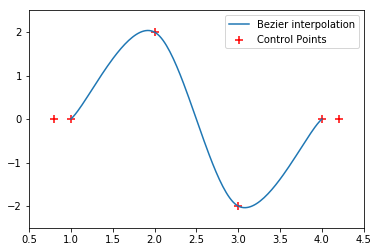

In [47]:
plot_interpol(points, b)
plt.xlim(0.5, 4.5)
plt.ylim(-2.5, 2.5)